# Zeeguu Architecture Reconstruction with Pyreverse

This notebook demonstrates how to use Pyreverse (provided with Pylint) to perform architecture reconstruction on the Zeeguu project, focusing solely on the backend (Zeeguu API).

## Overview

- **Zeeguu API (backend):** located in `data/api`

Before proceeding, ensure that Pylint (which includes Pyreverse) is installed, and that Graphviz is installed and configured on your system (its bin folder must be in your PATH).

In [10]:
import os
import sys
import subprocess

# Set working directory to the notebook directory (if available)
try:
    notebook_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    notebook_dir = os.getcwd()

os.chdir(notebook_dir)
print(f"Working directory set to: {os.getcwd()}")

# Install required packages using the current Python interpreter
def install_package(package):
    try:
        __import__(package.replace('-', '_'))
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_package('pylint')
install_package('graphviz')
install_package('pydot')

# Check Pyreverse version using the pyreverse command directly
try:
    subprocess.check_call(["pyreverse", "--version"])
except Exception as e:
    print("Error calling pyreverse. Ensure that the pyreverse command is available on your PATH and that Pylint is installed.")


Working directory set to: c:\Programming\Architecture\ArchitecturalRecovery\Tools
pylint is already installed.
graphviz is already installed.
pydot is already installed.


## 1. Generate Basic UML Diagrams

We will now generate basic UML diagrams for the API (backend). The output files will be stored in an output directory.

In [11]:
# Create the output directory using Python (cross-platform)
output_dir = os.path.join('output', 'pyreverse')
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory ensured at: {os.path.abspath(output_dir)}")

Output directory ensured at: c:\Programming\Architecture\ArchitecturalRecovery\Tools\output\pyreverse


In [12]:
import os
import sys
import subprocess

# Set working directory to the notebook directory (if available)
try:
    notebook_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    notebook_dir = os.getcwd()

os.chdir(notebook_dir)
print(f"Working directory set to: {os.getcwd()}")

# Compute the project root; Tools is one level below the project root.
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))
print(f"Project root set to: {project_root}")

# Define the correct path for the API repository
api_path = os.path.join(project_root, "Data", "api")

# Define the output directory (for example, relative to the project root)
output_dir = os.path.join(project_root, "output", "pyreverse")
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory set to: {output_dir}")

# Run Pyreverse for the API repository
result = subprocess.run([
    "pyreverse", api_path, "-o", "png", "-p", "zeeguu_api", "-d", output_dir
], capture_output=True, text=True)

print("STDOUT:")
print(result.stdout)
print("STDERR:")
print(result.stderr)

result.check_returncode()  # Raises an error if the command failed


Working directory set to: c:\Programming\Architecture\ArchitecturalRecovery\Tools
Project root set to: c:\Programming\Architecture\ArchitecturalRecovery
Output directory set to: c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse
STDOUT:
Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
Analysed 337 modules with a total of 134 imports

STDERR:
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.376325 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.573431 to fit



## 2. Displaying the Generated Diagrams

Use IPython’s display functions to show the generated API diagrams directly in the notebook.

API Classes Diagram:


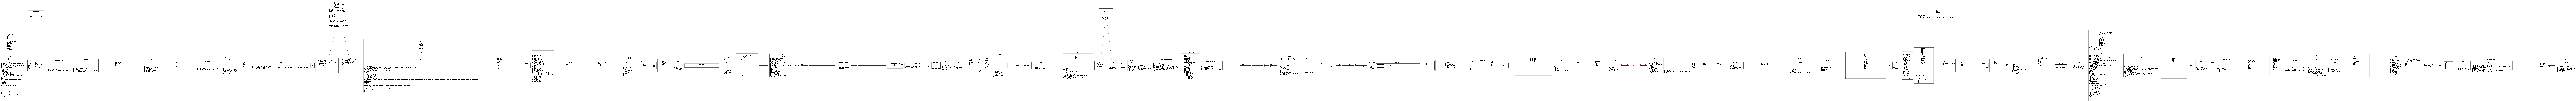

API Packages Diagram:


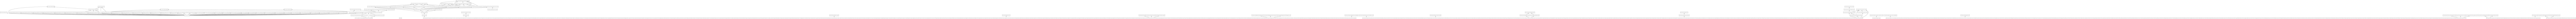

In [13]:
from IPython.display import Image, display

print("API Classes Diagram:")
display(Image(filename=os.path.join(output_dir, 'classes_zeeguu_api.png')))

print("API Packages Diagram:")
display(Image(filename=os.path.join(output_dir, 'packages_zeeguu_api.png')))

## 3. Advanced Pyreverse Options

Pyreverse offers several advanced options to refine the generated diagrams. Run the help command below to see all options available:

In [16]:
import subprocess

subprocess.check_call(["pyreverse", "--help"])


0

## 4. Focused Analysis and Filtering

You can generate more focused diagrams by filtering specific modules. For example, below we list some key modules from the API.

In [28]:
import os
import sys
import subprocess

# Calculate the project root relative to the Tools folder
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print("Project root:", project_root)

# (Optional) Insert the project root into sys.path for the current process
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Define and create the output directory for Pyreverse results
output_dir = os.path.join(project_root, "output", "pyreverse")
os.makedirs(output_dir, exist_ok=True)
print("Output directory:", output_dir)

# Prepare the environment: add project_root to PYTHONPATH so that the module can be found
env = os.environ.copy()
env["PYTHONPATH"] = project_root + os.pathsep + env.get("PYTHONPATH", "")

# Run the Pyreverse command using the module name with dot notation,
# and set the current working directory to the project root.
subprocess.check_call([
    "pyreverse", "Data.api.zeeguu", "-o", "png",
    "-p", "zeeguu_core_modules", "-d", output_dir, "--only-classname"
], cwd=project_root, env=env)


Project root: c:\Programming\Architecture\ArchitecturalRecovery
Output directory: c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse


0

## 6. Subsystem Analysis with Pyreverse

This section focuses on analyzing specific subsystems of the Zeeguu architecture by isolating parts of the code base. We define a helper function to generate and display diagrams for a given subsystem.

Project root: c:\Programming\Architecture\ArchitecturalRecovery
Output directory: c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse

Analyzing subsystem: zeeguu_api_endpoints
Running command: pyreverse Data.api.zeeguu.api.endpoints -o png -p zeeguu_api_endpoints -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse --only-classname --module-names=y --show-ancestors=1 --show-associated=1
Return code: 0
STDOUT:
Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
Analysed 40 modules with a total of 33 imports

STDERR:


zeeguu_api_endpoints Classes Diagram:



zeeguu_api_endpoints Packages Diagram:


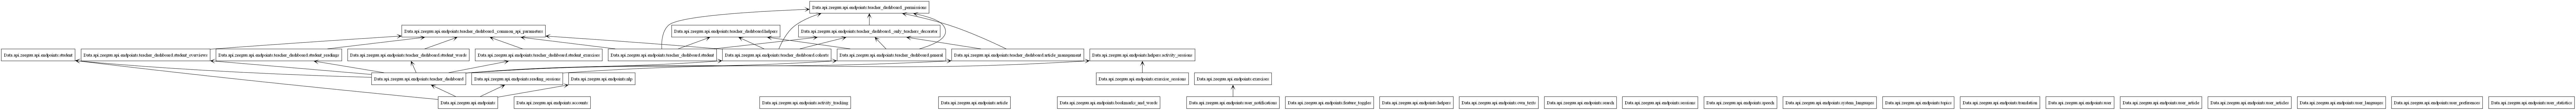


Analyzing subsystem: zeeguu_core
Running command: pyreverse Data.api.zeeguu.core -o png -p zeeguu_core -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse --only-classname --module-names=y --show-ancestors=1 --show-associated=1
Return code: 0
STDOUT:
Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
Analysed 211 modules with a total of 90 imports

STDERR:
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.497427 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.487278 to fit


zeeguu_core Classes Diagram:


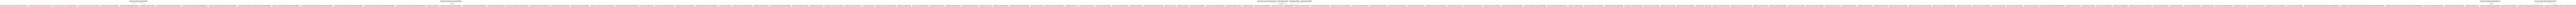


zeeguu_core Packages Diagram:


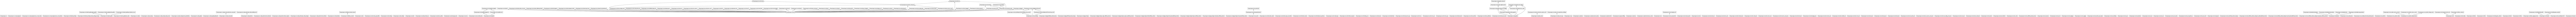


Analyzing subsystem: zeeguu_config
Running command: pyreverse Data.api.zeeguu.config -o png -p zeeguu_config -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse --only-classname --module-names=y --show-ancestors=1 --show-associated=1
Return code: 0
STDOUT:
Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
Analysed 2 modules with a total of 0 imports

STDERR:


zeeguu_config Classes Diagram:



zeeguu_config Packages Diagram:


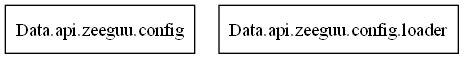


Analyzing subsystem: zeeguu_logging
Running command: pyreverse Data.api.zeeguu.logging -o png -p zeeguu_logging -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse --only-classname --module-names=y --show-ancestors=1 --show-associated=1
Return code: 0
STDOUT:
Format png is not supported natively. Pyreverse will try to generate it using Graphviz...

STDERR:


zeeguu_logging Classes Diagram:


No package diagram generated for zeeguu_logging


In [40]:
import os
import sys
import subprocess
from IPython.display import Image, display

# ---------------------------
# Setup common variables
# ---------------------------
# Calculate the project root relative to the Tools folder (where your notebook resides)
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print("Project root:", project_root)

# Insert the project root into sys.path so Python can locate the packages
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Define and create the output directory for Pyreverse results
output_dir = os.path.join(project_root, "output", "pyreverse")
os.makedirs(output_dir, exist_ok=True)
print("Output directory:", output_dir)

# Prepare the environment: add project_root to PYTHONPATH
env = os.environ.copy()
env["PYTHONPATH"] = project_root + os.pathsep + env.get("PYTHONPATH", "")

# ---------------------------
# Define subsystem analysis function
# ---------------------------
def analyze_subsystem(module_name, name):
    """Generate and display UML diagrams for a specific subsystem with debug info."""
    print(f"\nAnalyzing subsystem: {name}")
    
    # Build the command list; set options that require values with an '='
    cmd = [
        "pyreverse", module_name, "-o", "png", "-p", name, "-d", output_dir,
        "--only-classname",
        "--module-names=y",
        "--show-ancestors=1",
        "--show-associated=1"
    ]
    
    print("Running command:", " ".join(cmd))
    
    # Run the command and capture output for debugging
    result = subprocess.run(cmd, cwd=project_root, env=env, capture_output=True, text=True)
    
    print("Return code:", result.returncode)
    print("STDOUT:")
    print(result.stdout)
    print("STDERR:")
    print(result.stderr)
    
    # Raise an error if the command failed
    result.check_returncode()
    
    # Determine expected output filenames
    class_diagram = os.path.join(output_dir, f"classes_{name}.png")
    package_diagram = os.path.join(output_dir, f"packages_{name}.png")
    
    if os.path.exists(class_diagram):
        print(f"\n{name} Classes Diagram:")
        display(Image(filename=class_diagram))
    else:
        print(f"No class diagram generated for {name}")
    
    if os.path.exists(package_diagram):
        print(f"\n{name} Packages Diagram:")
        display(Image(filename=package_diagram))
    else:
        print(f"No package diagram generated for {name}")

# ---------------------------
# Analyze selected subsystems using the fully qualified module names
# ---------------------------
# For API endpoints:
analyze_subsystem("Data.api.zeeguu.api.endpoints", "zeeguu_api_endpoints")

# For core functionality:
analyze_subsystem("Data.api.zeeguu.core", "zeeguu_core")

# For configuration:
analyze_subsystem("Data.api.zeeguu.config", "zeeguu_config")

# For logging:
analyze_subsystem("Data.api.zeeguu.logging", "zeeguu_logging")


# 8 dot files

Project root: c:\Programming\Architecture\ArchitecturalRecovery
API Repository root: c:\Programming\Architecture\ArchitecturalRecovery\Data\Api
Output directory: c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse
Creating module view for: zeeguu.core
Running command: pyreverse zeeguu.core -o dot -p zeeguu_core_view -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse\custom --ignore=test,__pycache__ --module-names=y --only-classname

Zeeguu Core Components Viewpoint:


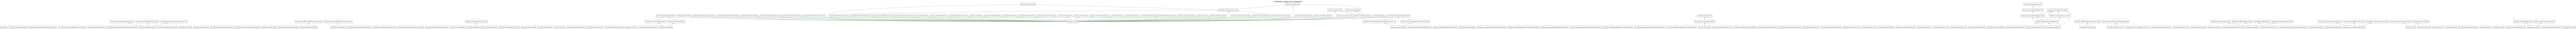

Creating module view for: zeeguu.core.model
Running command: pyreverse zeeguu.core.model -o dot -p zeeguu_model_view -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse\custom --ignore=test,__pycache__ --module-names=y --only-classname

Zeeguu Data Model Components Viewpoint:


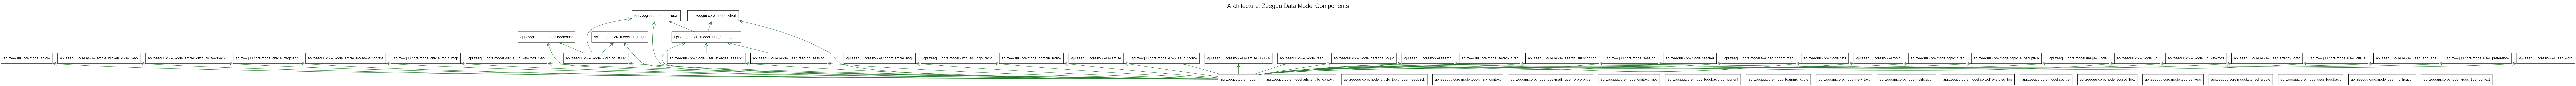

'c:\\Programming\\Architecture\\ArchitecturalRecovery\\output\\pyreverse\\custom\\zeeguu_model_view_custom.png'

In [44]:
import os
import sys
import subprocess
from IPython.display import Image, display

# ---------------------------
# Setup common variables
# ---------------------------
# Assume this notebook is in "C:\Programming\Architecture\ArchitecturalRecovery\Tools"
# Then the project root is one level up:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print("Project root:", project_root)

# Define the API repository root (which is under Data\Api)
api_repo_root = os.path.join(project_root, "Data", "Api")
print("API Repository root:", api_repo_root)

# Insert the API repository root into sys.path so that Python can locate the packages
if api_repo_root not in sys.path:
    sys.path.insert(0, api_repo_root)

# Define and create the output directory for Pyreverse results
output_dir = os.path.join(project_root, "output", "pyreverse")
os.makedirs(output_dir, exist_ok=True)
print("Output directory:", output_dir)

# Prepare the environment: add the API repository root to PYTHONPATH
env = os.environ.copy()
env["PYTHONPATH"] = api_repo_root + os.pathsep + env.get("PYTHONPATH", "")

# ---------------------------
# Function to customize DOT files for improved visualization
# ---------------------------
def customize_dot_file(input_dot, output_dot, title, node_color="#ADD8E6", edge_color="#4682B4"):
    """Customize a DOT file to improve visualization."""
    if not os.path.exists(input_dot):
        print(f"Input DOT file {input_dot} not found")
        return None

    with open(input_dot, 'r') as f:
        dot_content = f.read()

    import re
    digraph_pattern = r'(digraph\s+[^{]+\{)'
    styling = (
        f"\n  label=\"Architecture: {title}\";\n"
        "  fontname=\"Arial\";\n"
        "  fontsize=20;\n"
        "  labelloc=\"t\";\n"
        "  bgcolor=\"white\";\n"
        f"  node [shape=box, style=filled, fillcolor=\"{node_color}\", fontname=\"Arial\", fontsize=12];\n"
        f"  edge [color=\"{edge_color}\", penwidth=1.0, fontname=\"Arial\", fontsize=10];\n"
    )
    # Append the styling after the opening "digraph ... {"
    modified_content = re.sub(digraph_pattern, r'\1' + styling, dot_content)

    with open(output_dot, 'w') as f:
        f.write(modified_content)

    output_png = output_dot.replace('.dot', '.png')
    subprocess.check_call(["dot", "-Tpng", output_dot, "-o", output_png])
    return output_png

# ---------------------------
# Function to create a module view for a given subsystem
# ---------------------------
def create_module_view(module_name, output_name, title, ignore_patterns="test,__pycache__"):
    """Create a module viewpoint for a specific part of the system."""
    print(f"Creating module view for: {module_name}")
    
    custom_dir = os.path.join(output_dir, 'custom')
    os.makedirs(custom_dir, exist_ok=True)
    
    # The DOT file that will be generated by pyreverse
    dot_file = os.path.join(custom_dir, f"packages_{output_name}.dot")
    
    # Build the command using the module name (in dot notation) and proper options.
    # Since we are analyzing the API repository, module names are relative to api_repo_root.
    cmd = [
        "pyreverse", module_name, "-o", "dot", "-p", output_name, "-d", custom_dir,
        "--ignore=" + ignore_patterns,
        "--module-names=y",
        "--only-classname"
    ]
    
    print("Running command:", " ".join(cmd))
    subprocess.check_call(cmd, cwd=api_repo_root, env=env)
    
    # Define the output DOT file for the customized view
    output_custom_dot = os.path.join(custom_dir, f"{output_name}_custom.dot")
    output_png = customize_dot_file(dot_file, output_custom_dot, title, node_color="#E8F5E9", edge_color="#2E7D32")
    
    if output_png and os.path.exists(output_png):
        print(f"\n{title} Viewpoint:")
        display(Image(filename=output_png))
        return output_png
    else:
        print("Failed to generate module view")
        return None

# ---------------------------
# Create module views for core API functionality and API models
# ---------------------------
# For core components (located at: Data\Api\zeeguu\core)
create_module_view("zeeguu.core", "zeeguu_core_view", "Zeeguu Core Components")
# For data model components (located at: Data\Api\zeeguu\core\model)
create_module_view("zeeguu.core.model", "zeeguu_model_view", "Zeeguu Data Model Components")


## 9. Creating Customized Architecture Views

Below are helper functions that create specialized module views and a layered architecture view, as well as a metrics-enriched view using analysis from the DOT files.

Project root: c:\Programming\Architecture\ArchitecturalRecovery
API Repository root: c:\Programming\Architecture\ArchitecturalRecovery\Data\Api
Output directory: c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse
Running command: pyreverse zeeguu -o dot -p zeeguu_api_dot -d c:\Programming\Architecture\ArchitecturalRecovery\output\pyreverse

Zeeguu System Architecture Layered Architecture View:


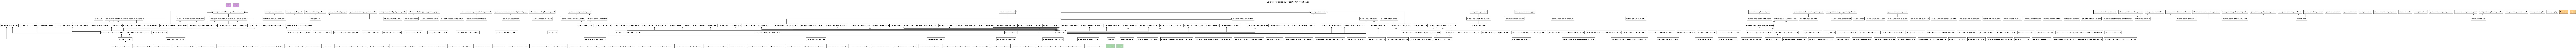

'c:\\Programming\\Architecture\\ArchitecturalRecovery\\output\\pyreverse\\zeeguu_architecture_layered.png'

In [45]:
import os
import sys
import subprocess
from IPython.display import Image, display

# ---------------------------
# Setup common variables
# ---------------------------
# Assume this notebook is in "C:\Programming\Architecture\ArchitecturalRecovery\Tools"
# The project root is one level up:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print("Project root:", project_root)

# Define the API repository root (located at Data\Api)
api_repo_root = os.path.join(project_root, "Data", "Api")
print("API Repository root:", api_repo_root)

# Insert the API repository root into sys.path so that Python can locate the packages
if api_repo_root not in sys.path:
    sys.path.insert(0, api_repo_root)

# Define and create the output directory for Pyreverse results
output_dir = os.path.join(project_root, "output", "pyreverse")
os.makedirs(output_dir, exist_ok=True)
print("Output directory:", output_dir)

# Prepare the environment: add the API repository root to PYTHONPATH
env = os.environ.copy()
env["PYTHONPATH"] = api_repo_root + os.pathsep + env.get("PYTHONPATH", "")

# ---------------------------
# Function to customize DOT files for improved visualization
# ---------------------------
def customize_dot_file(input_dot, output_dot, title, node_color="#ADD8E6", edge_color="#4682B4"):
    """Customize a DOT file to improve visualization."""
    if not os.path.exists(input_dot):
        print(f"Input DOT file {input_dot} not found")
        return None

    with open(input_dot, 'r') as f:
        dot_content = f.read()

    import re
    digraph_pattern = r'(digraph\s+[^{]+\{)'
    styling = (
        f"\n  label=\"Architecture: {title}\";\n"
        "  fontname=\"Arial\";\n"
        "  fontsize=20;\n"
        "  labelloc=\"t\";\n"
        "  bgcolor=\"white\";\n"
        f"  node [shape=box, style=filled, fillcolor=\"{node_color}\", fontname=\"Arial\", fontsize=12];\n"
        f"  edge [color=\"{edge_color}\", penwidth=1.0, fontname=\"Arial\", fontsize=10];\n"
    )
    # Append the styling after the opening "digraph ... {"
    modified_content = re.sub(digraph_pattern, r'\1' + styling, dot_content)

    with open(output_dot, 'w') as f:
        f.write(modified_content)

    output_png = output_dot.replace('.dot', '.png')
    subprocess.check_call(["dot", "-Tpng", output_dot, "-o", output_png])
    return output_png

# ---------------------------
# Function to create a layered architecture view from a DOT file
# ---------------------------
def create_layered_view(dot_file_path, output_name, title):
    """Create a layered architecture view from a DOT file."""
    if not os.path.exists(dot_file_path):
        print(f"Input DOT file {dot_file_path} not found")
        return None

    with open(dot_file_path, 'r') as f:
        dot_content = f.read()

    output_dot = os.path.join(os.path.dirname(dot_file_path), f"{output_name}_layered.dot")

    # Define layered ranking and dummy nodes (API only version)
    layers = """
    // Layered architecture ranks
    { rank=same; api_modules; controllers; }
    { rank=same; core_modules; services; }
    { rank=sink; models; database; }
    
    // Layer labels
    subgraph cluster_application { label="Application Layer"; style=filled; color="#E8F5E9"; api_modules; controllers; }
    subgraph cluster_domain { label="Domain Layer"; style=filled; color="#FFF3E0"; core_modules; services; }
    subgraph cluster_data { label="Data Layer"; style=filled; color="#F3E5F5"; models; database; }
    """
    dummy_nodes = """
    // Dummy nodes for layer visualization
    api_modules [label="API Endpoints", style=filled, fillcolor="#A5D6A7"];
    controllers [label="Controllers", style=filled, fillcolor="#A5D6A7"];
    core_modules [label="Core Modules", style=filled, fillcolor="#FFCC80"];
    services [label="Services", style=filled, fillcolor="#FFCC80"];
    models [label="Models", style=filled, fillcolor="#CE93D8"];
    database [label="Database", style=filled, fillcolor="#CE93D8"];
    """

    closing_brace_pos = dot_content.rfind('}')
    if closing_brace_pos == -1:
        print("Invalid DOT file format")
        return None

    modified_content = dot_content[:closing_brace_pos] + dummy_nodes + layers + dot_content[closing_brace_pos:]

    import re
    digraph_pattern = r'(digraph\s+[^{]+\{)'
    styling = (
        f"\n  label=\"Layered Architecture: {title}\";\n"
        "  fontname=\"Arial\";\n"
        "  fontsize=20;\n"
        "  labelloc=\"t\";\n"
        "  rankdir=TB;\n"
        "  compound=true;\n"
        "  splines=ortho;\n"
        "  node [shape=box, style=filled, fontname=\"Arial\", fontsize=12];\n"
        "  edge [penwidth=1.0, fontname=\"Arial\", fontsize=10];\n"
    )
    modified_content = re.sub(digraph_pattern, r'\1' + styling, modified_content)

    with open(output_dot, 'w') as f:
        f.write(modified_content)

    output_png = output_dot.replace('.dot', '.png')
    subprocess.check_call(["dot", "-Tpng", output_dot, "-o", output_png])

    if os.path.exists(output_png):
        print(f"\n{title} Layered Architecture View:")
        display(Image(filename=output_png))
        return output_png
    else:
        print("Failed to generate layered view")
        return None

# ---------------------------
# Generate the DOT file for the entire API backend (for layered view)
# ---------------------------
# We generate the DOT file for the "zeeguu" package.
dot_api = os.path.join(output_dir, 'packages_zeeguu_api_dot.dot')
if not os.path.exists(dot_api):
    cmd = [
        "pyreverse", "zeeguu", "-o", "dot", "-p", "zeeguu_api_dot", "-d", output_dir
    ]
    print("Running command:", " ".join(cmd))
    subprocess.check_call(cmd, cwd=api_repo_root, env=env)

# Create the layered architecture view using the generated DOT file
create_layered_view(dot_api, "zeeguu_architecture", "Zeeguu System Architecture")


## 10. Adding Metrics Information to the Views

Finally, we can analyze the dependency graph from a DOT file using NetworkX and pydot to compute metrics (like node count, edge count, and density) and incorporate them into the diagram.


Zeeguu API Architecture Metrics-Enriched View:


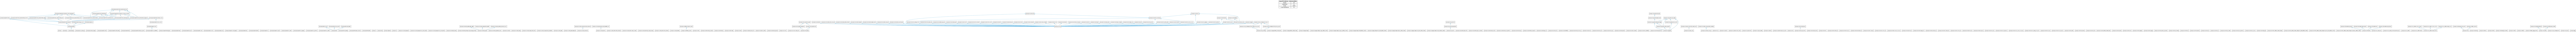

'c:\\Programming\\Architecture\\ArchitecturalRecovery\\output\\pyreverse\\zeeguu_api_metrics_metrics.png'

In [47]:
import glob
import pydot
import networkx as nx
from IPython.display import Image, display

def analyze_dependencies(dot_file):
    """Analyze module dependencies from a DOT file"""
    if not os.path.exists(dot_file):
        print(f"DOT file {dot_file} not found")
        return {}
    try:
        graphs = pydot.graph_from_dot_file(dot_file)
        if not graphs:
            print("No graph found in DOT file")
            return {}
        graph = graphs[0]
        nx_graph = nx.DiGraph()
        for node in graph.get_nodes():
            name = node.get_name().strip('"')
            nx_graph.add_node(name)
        for edge in graph.get_edges():
            source = edge.get_source().strip('"')
            dest = edge.get_destination().strip('"')
            nx_graph.add_edge(source, dest)
        metrics = {
            'node_count': nx_graph.number_of_nodes(),
            'edge_count': nx_graph.number_of_edges(),
            'density': nx.density(nx_graph),
            'in_degree': dict(nx_graph.in_degree()),
            'out_degree': dict(nx_graph.out_degree()),
            'has_cycles': len(list(nx.simple_cycles(nx_graph))) > 0
        }
        return metrics
    except Exception as e:
        print(f"Error analyzing dependencies: {e}")
        return {}

def create_metrics_enriched_view(dot_file, output_name, title):
    """Create an architectural view enriched with metrics"""
    metrics = analyze_dependencies(dot_file)
    if not metrics:
        print("Failed to analyze metrics")
        return None
    with open(dot_file, 'r') as f:
        dot_content = f.read()
        
    metrics_label = (
        "  label=<<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\" CELLPADDING=\"4\">\n"
        f"    <TR><TD COLSPAN=\"2\"><B>{title} - Architectural Metrics</B></TD></TR>\n"
        f"    <TR><TD>Modules</TD><TD>{metrics['node_count']}</TD></TR>\n"
        f"    <TR><TD>Dependencies</TD><TD>{metrics['edge_count']}</TD></TR>\n"
        f"    <TR><TD>Density</TD><TD>{metrics['density']:.4f}</TD></TR>\n"
        f"    <TR><TD>Circular Dependencies</TD><TD>{'Yes' if metrics['has_cycles'] else 'No'}</TD></TR>\n"
        "  </TABLE>>;\n  labelloc=\"t\";\n"
    )
    
    import re
    # Use a lambda for the replacement so we can include the captured group and our styling.
    modified_content = re.sub(r'(digraph\s+[^{]+\{)', 
                              lambda m: m.group(1) +
                              "\n  fontname=\"Arial\";\n"
                              "  node [shape=box, style=filled, fillcolor=\"#E1F5FE\", fontname=\"Arial\", fontsize=10];\n"
                              "  edge [color=\"#0288D1\", penwidth=1.0, fontname=\"Arial\", fontsize=8];\n"
                              + metrics_label,
                              dot_content)
    
    output_dot = os.path.join(os.path.dirname(dot_file), f"{output_name}_metrics.dot")
    with open(output_dot, 'w') as f:
        f.write(modified_content)
    
    output_png = output_dot.replace('.dot', '.png')
    result = subprocess.run(["dot", "-Tpng", output_dot, "-o", output_png],
                            capture_output=True, text=True)
    if result.returncode != 0:
        print("Dot command failed with error:")
        print(result.stderr)
        return None
    
    if os.path.exists(output_png):
        print(f"\n{title} Metrics-Enriched View:")
        display(Image(filename=output_png))
        return output_png
    else:
        print("Failed to generate metrics-enriched view")
        return None

# ---------------------------
# Ensure the DOT file for the API exists
# ---------------------------
# (Adjust this call if necessary; here we assume the DOT file for the API was generated earlier.)
dot_api = os.path.join(output_dir, 'packages_zeeguu_api_dot.dot')
if not os.path.exists(dot_api):
    subprocess.check_call([
        "pyreverse", "zeeguu", "-o", "dot", "-p", "zeeguu_api_dot", "-d", output_dir
    ], cwd=api_repo_root, env=env)

create_metrics_enriched_view(dot_api, "zeeguu_api_metrics", "Zeeguu API Architecture")
